In [ ]:
#%%HTML
#<style> code {background-color : pink !important;} </style>

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from pathlib import Path
#%matplotlib qt

In [2]:
# directory:  the directory where the callibration images are
# nx,ny the number of points inside the chess board
def find_points(directory,nx,ny):
    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    objp = np.zeros((nx*ny,3), np.float32)
    objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)
    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.
    
    # Make a list of calibration images
    input_path=Path(directory)
    limages=list(input_path.glob('*.jpg'))
    #images = glob.glob('../camera_cal/*.jpg')
    #print(limages)
    for input_image in limages:
        #print(input_image)
        img = cv2.imread(str(input_image))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
    
        # If found, add object points, image points
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)
            
            # Draw and display the corners
            #cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
            #write_name = 'corners_found'+str(idx)+'.jpg'
            #cv2.imwrite(write_name, img)
            #cv2.imshow('img', img)
            #cv2.waitKey(500)
            
    #cv2.destroyAllWindows()
    return objpoints,imgpoints    

In [3]:
objpoints,imgpoints=find_points("../camera_cal/",9,5)

# Here we will use pickle to save info

In [4]:
img = cv2.imread('../camera_cal/calibration3.jpg')
img_size = (img.shape[1], img.shape[0])
print(img_size)
# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

(1280, 720)


In [7]:
import pickle

In [8]:
# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "config/wide_dist_pickle.p", "wb" ) )

# So now the function

In [9]:
def saveValuesToUndistort(objpoints,imgpoints,img_size,filename):
    # Do camera calibration given object points and image points
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
    # Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
    dist_pickle = {}
    dist_pickle["mtx"] = mtx
    dist_pickle["dist"] = dist
    filename=filename+".p"
    print(filename)
    pickle.dump( dist_pickle, open( filename, "wb" ) )

In [10]:
saveValuesToUndistort(objpoints,imgpoints,img_size,"config/values_to_undistort")

config/values_to_undistort.p


### I suppose now I should put something to read the values

In [ ]:
# Read in the saved objpoints and imgpoints
#dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
#objpoints = dist_pickle["objpoints"]
#imgpoints = dist_pickle["imgpoints"]

In [11]:
def readValuesToUndistort(filename):
    dist_pickle=pickle.load( open( filename, "rb" ) )
    mtx=dist_pickle["mtx"]
    dist=dist_pickle["dist"]
    return mtx,dist

In [13]:
m2,d2=readValuesToUndistort("config/values_to_undistort.p")

In [14]:
m2==mtx

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [15]:
d2==dist

array([[ True,  True,  True,  True,  True]])

Text(0.5, 1.0, 'Undistorted Image')

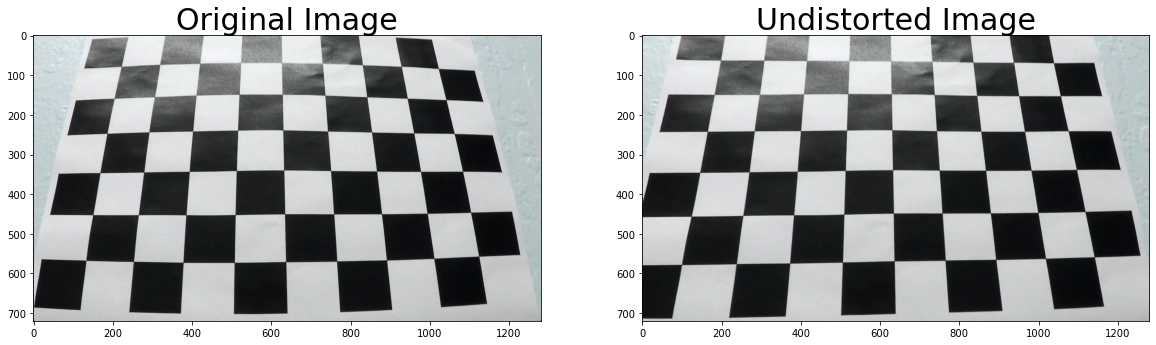

In [16]:
dst = cv2.undistort(img, m2, d2, None, mtx)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

### Now just to test

In [ ]:
img = cv2.imread('../camera_cal/calibration3.jpg')
img_size = (img.shape[1], img.shape[0])
print(img_size)

In [ ]:
# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

In [ ]:
dst = cv2.undistort(img, mtx, dist, None, mtx)

In [ ]:
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

# So now the function to distort

In [ ]:
def undistort(image,objpoints,imgpoints):
    img_size = (image.shape[1], image.shape[0])
    # Do camera calibration given object points and image points
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
    dst = cv2.undistort(image, mtx, dist, None, mtx)
    
    return dst

# Trying the function to distort the image

In [ ]:
img = cv2.imread('../camera_cal/calibration12.jpg')
destino=undistort(img,objpoints,imgpoints)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(destino)
ax2.set_title('Undistorted Image', fontsize=30)